# Example 3 - Power Flow

In [1]:
from CircuitCalculator.SimpleCircuit.Elements import Schematic, Resistor, Line, Ground, VoltageSource
from CircuitCalculator.SimpleCircuit.DiagramSolution import real_solution
from CircuitCalculator.Network.NodalAnalysis.bias_point_analysis import nodal_analysis_bias_point_solver

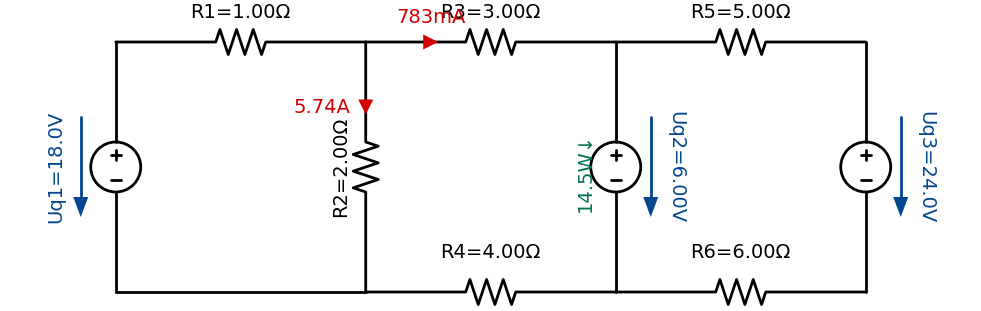

In [2]:
R1, R2, R3, R4, R5, R6 = 1, 2, 3, 4, 5, 6
Uq1, Uq2, Uq3 = 18, 6, 24
with Schematic(unit=(u:=5)) as schematic:
    schematic += VoltageSource(V=Uq1, name='Uq1', reverse=True).up()
    schematic += Resistor(R=R1, name='R1').right()
    schematic += Resistor(R=R2, name='R2').down()
    schematic += Line().left()
    schematic += Resistor(R=R3, name='R3').at(schematic['R1'].end).right()
    schematic += VoltageSource(V=Uq2, name='Uq2', reverse=False).down()
    schematic += Resistor(R=R4, name='R4').left()
    schematic += Resistor(R=R5, name='R5').at(schematic['R3'].end).right()
    schematic += VoltageSource(V=Uq3, name='Uq3', reverse=False).down()
    schematic += Resistor(R=R6, name='R6').left()
    schemdraw_solution = real_solution(schematic=schematic)
    schematic += schemdraw_solution.draw_current('R2', reverse=False)
    schematic += schemdraw_solution.draw_current('R3', reverse=False)
    schematic += schemdraw_solution.draw_power('Uq2')